<a href="https://colab.research.google.com/github/fmbento/Jupyter-Notebooks_ad-hoc-solutions/blob/main/TomHarper_HMD_Labels_from_Filenames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How To...

**Generate** the **Source File**:

  1. Open Windows **Command Prompt** (easier way: Windows Search for "cmd");
  2. Go to the **source directory** (e.g., type "n:" (enter) > "cd \Imaging Production\LivingWithMachines\LWM Maps\Ready for Delivery\For Ingest" (enter));
  3. Run "**dir /a-D /S /B /OD \*.tif > HMD_List_Of_Files.txt**";
  4. Navigate with Windows Explorer to the source directory and **open this file** with **Notepad++**:
    
    a) Just in case some file is out of order, use Notepad++ sort operation displayed bellow:
    
    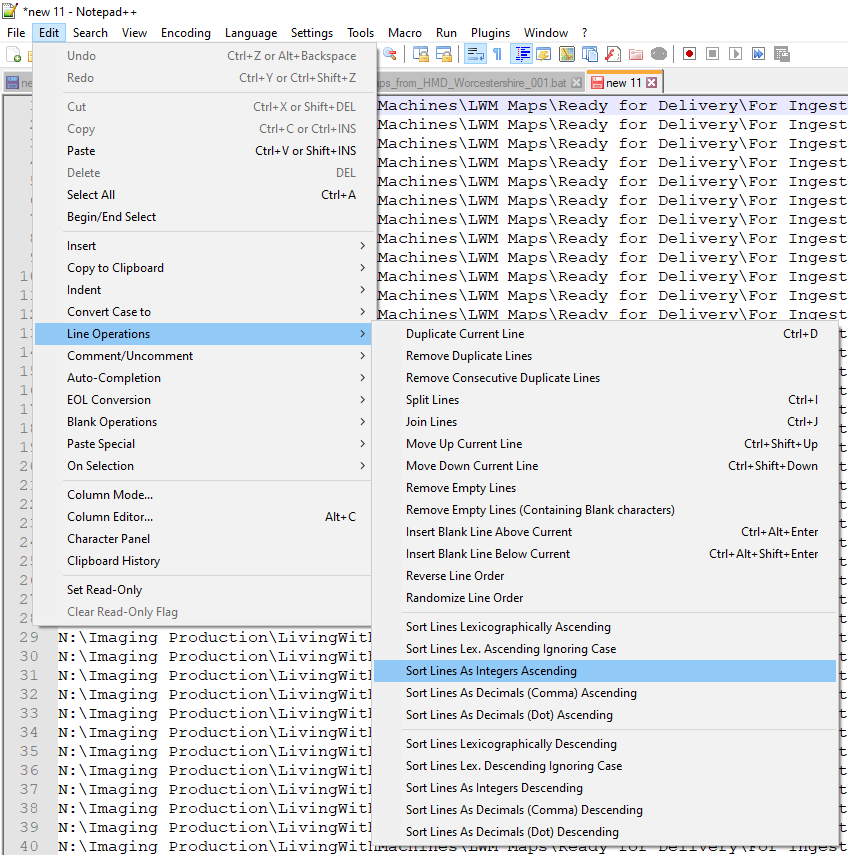

    b) **Add** the text "**Filename**" as the **first line** of it, and save it.

**Run** this code:

1. **Upload** this file (**HMD_List_Of_Files.txt** [[example](https://raw.githubusercontent.com/fmbento/Jupyter-Notebooks_ad-hoc-solutions/main/HMD_List_Of_Files.txt)]) to the same folder where the script runs;
2. **Run** the script;
3. **Download** the **output** file: **HMD_Files_Labels.csv**

**Run** this code on **Google Colab**:
> Click **show files** (1), upload or drag-and-drop **HMD_List_Of_Files.txt** to the root folder (2), before running the cell (3):




> 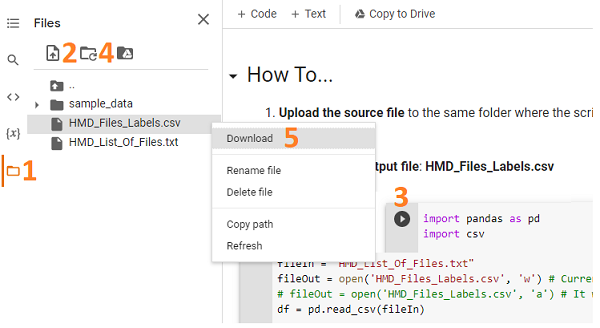

> **Refresh** the **folder contents** (4) and **download** the file **HMD_Files_Labels.csv** (5) from the root folder (click the 3 ":" in front of its name).

In [ ]:
import pandas as pd
import csv

fileIn = "HMD_List_Of_Files.txt"
fileOut = open('HMD_Files_Labels.csv', 'w') # Current contents will be overwriten
# fileOut = open('HMD_Files_Labels.csv', 'a') # It will append to current contents
df = pd.read_table(fileIn) # pd.read_csv wouldn't work because some folders have a comma in their name, hence those would be splitten in more than a field (error: the number of fields wouldn't match for all the lines [should be just one, in this case]) 

writer = csv.writer(fileOut)
header = ['FullPath','File', 'Order', 'Type','Label']
writer.writerow(header)

order=1

for file in df["Filename"]:
    NumberOfFolders = len(file.split('\\'))
    # print(NumberOfFolders)
    filename = file.split('\\')[NumberOfFolders-1]
    NumberOfUnderScores = len(filename.split('_'))
    if (NumberOfUnderScores) == 6:
        label=filename.split('_')[5]
    else: # Filename has a Parish on it
        label=filename.split('_')[NumberOfUnderScores-2]+"_"+filename.split('_')[NumberOfUnderScores-1]
    label = label.replace('.tif', '')
    label = label.replace('_', '-')
    label = label.replace('TP', 'Title Page')
    label = label.replace('INDEX', 'Index')
    out = [file.strip().replace('N:', '\\\\ad\\collections'),filename.strip(),order,'Page',label]
    writer.writerow(out)
    print(out)
    order = order+1
fileOut.close()